In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow.contrib import learn
from sklearn.metrics import mean_squared_error

from data_processing import generate_data, x_sin
from polyaxon_experiement import create_experiment
from polyaxon.processing.input_fn import numpy_input_fn

tf.logging.set_verbosity(tf.logging.INFO)

In [2]:
TIMESTEPS = 10
X, y = generate_data(x_sin, np.linspace(0, 100, 10000, dtype=np.float32), TIMESTEPS, seperate=False)
xp = create_experiment('/tmp/polyaxon_logs/xsin', X, y, train_steps=10000, num_units=TIMESTEPS, num_layers=2)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': None, '_save_checkpoints_steps': 100, '_model_dir': None, '_save_summary_steps': 100, '_num_ps_replicas': 0, '_is_chief': True, '_task_type': None, '_session_config': None, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_task_id': 0, '_keep_checkpoint_every_n_hours': 4, '_environment': 'local', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x112fbaa20>, '_tf_random_seed': 1, '_keep_checkpoint_max': 5, '_master': '', '_num_worker_replicas': 0}


In [7]:
xp.continuous_train_and_evaluate()

INFO:tensorflow:Training model for 100 steps
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/polyaxon_logs/xsin/model.ckpt-10000
INFO:tensorflow:Saving checkpoints for 10001 into /tmp/polyaxon_logs/xsin/model.ckpt.
INFO:tensorflow:loss = 0.00194829, step = 10001
INFO:tensorflow:Saving checkpoints for 10100 into /tmp/polyaxon_logs/xsin/model.ckpt.
INFO:tensorflow:Loss for final step: 0.0150554.
INFO:tensorflow:Evaluating model now.
INFO:tensorflow:Starting evaluation at 2017-06-15-17:16:33
INFO:tensorflow:Restoring parameters from /tmp/polyaxon_logs/xsin/model.ckpt-10100
INFO:tensorflow:Evaluation [1/10]
INFO:tensorflow:Evaluation [2/10]
INFO:tensorflow:Evaluation [3/10]
INFO:tensorflow:Evaluation [4/10]
INFO:tensorflow:Evaluation [5/10]
INFO:tensorflow:Evaluation [6/10]
INFO:tensorflow:Evaluation [7/10]
INFO:tensorflow:Evaluation [8/10]
INFO:tensorflow:Evaluation [9/10]
INFO:tensorflow:Evaluation [10/10]
INFO:tensorflow:Finished evaluation at 

({'global_step': 10100,
  'loss': 182.38124,
  'streaming_mean_absolute_error': 9.3119144,
  'streaming_root_mean_squared_error': 13.50486},
 [])

In [8]:
predicted = [i['results'] for i in xp.estimator.predict(numpy_input_fn({'x': X['test']}, shuffle=False))]
rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

INFO:tensorflow:Restoring parameters from /tmp/polyaxon_logs/xsin/model.ckpt-10100
MSE: 2597.554688


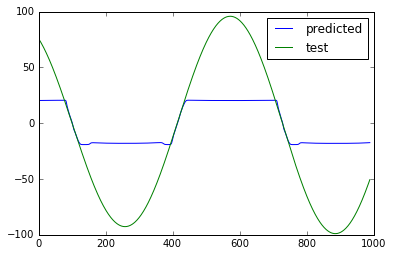

In [9]:
plot_predicted, = plt.plot(predicted, label='predicted')
plot_test, = plt.plot(y['test'], label='test')
plt.legend(handles=[plot_predicted, plot_test])

INFO:tensorflow:Restoring parameters from /tmp/polyaxon_logs/xsin/model.ckpt-10100


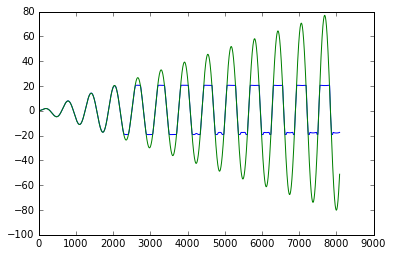

In [10]:
train_prediction = [i['results'] for i in xp.estimator.predict(numpy_input_fn({'x': X['train']}, shuffle=False))]
plt.plot(train_prediction)
plt.plot(y['train'])